In [ ]:
# import the required libraries
import cv2
import copy
import random
import numpy as np
from PIL import Image
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
from matplotlib import pylab as pylab

In [ ]:
path =  ''                            # path of the folder of the files

def load_images_from_folder(folder):
    images = []
    file_name = []
    for filename in os.listdir(folder):
        file_name.append(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(150,150))
        #hsvim = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
        if img is not None:
            images.append(img)
    return images, file_name

img_names = load_images_from_folder(path)
img_name = np.array(img_names)

In [ ]:
#Remove the text from the images
def remove_text(image):
    ret,thresh1 = cv2.threshold(image,20,255,cv2.THRESH_BINARY)
    
    kernel = np.ones((20,20),np.uint8)
    opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
    
    kernel = np.ones((500,400),np.uint8)
    erosion = cv2.erode(opening,kernel,iterations = 1)
    
    kernel = np.ones((800,800),np.uint8)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    
    kernel = np.ones((500,300),np.uint8)
    erosion = cv2.erode(dilation,kernel,iterations = 1)

    kernel = np.ones((400,50),np.uint8)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    
    merged = cv2.bitwise_and(image, image , mask=dilation)
    return merged


# Make the images right orient
def right_orient_mammogram(image):
    left_nonzero = cv2.countNonZero(image[:, 0:int(image.shape[1]/2)])
    right_nonzero = cv2.countNonZero(image[:, int(image.shape[1]/2):])
    
    if(left_nonzero < right_nonzero):
        image = cv2.flip(image, 1)
    
    return image

#Read the images 
def read_image(filename):
    image = cv2.imread(path+filename,0)
    image = color.rgb2gray(image)
    image = right_orient_mammogram(image)
    return image


def Adaptive_Equalization(IMG_IN):
  
  original = read_image(IMG_IN)
  # Read the image, convert it into grayscale, and make in binary image for threshold value of 1.

  img = read_image(IMG_IN)
  # use binary threshold, all pixel that are beyond 3 are made white
  _, thresh_original = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)

  # Now find contours in it.
  thresh = copy.copy(thresh_original)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  # get contours with highest height
  lst_contours = []
  for cnt in contours:
      ctr = cv2.boundingRect(cnt)
      lst_contours.append(ctr)
  x,y,w,h = sorted(lst_contours, key=lambda coef: coef[3])[-1]


  # draw contours
  ctr = copy.copy(original)
  cv2.rectangle(ctr, (x,y),(x+w,y+h),(0,255,0),2)

  crop_img = ctr[y:y+h, x:x+w]

  crop_img = remove_text(crop_img)
  # display results with matplotlib

  print('==============================================================================================')

  bold_start = '\033[1m'
  bold_end   = '\033[0m'

  print(bold_start, "The output of the cropped image", bold_end)

  plt.figure(figsize=(15,15))
  # original
  #original = original[:,:,::-1] # flip color for maptolib display
  plt.subplot(131), plt.imshow(original, 'gray')
  plt.title('Original Image'), plt.xticks([]),plt.yticks([])

  # Threshold
  plt.subplot(132), plt.imshow(thresh_original, cmap='gray')
  plt.title('threshold binary'), plt.xticks([]),plt.yticks([])

  # selected area for future crop
  #ctr = ctr[:,:,::-1] # flip color for maptolib display
  plt.subplot(133), plt.imshow(crop_img, 'gray')
  plt.title('Selected area'), plt.xticks([]),plt.yticks([])

  plt.show()

  bold_start = '\033[1m'
  bold_end   = '\033[0m'

  print(bold_start, "The output of the ADAPRIVE HISTOGRAM EQULIZATION", bold_end)

  img_raw = LoadImageFloat(crop_img, bits = 16)
  img_plain = DefaultImageManipulation(img_raw.copy(), edge_factor = 1.0 \
                                      , adaptive_eq_args = None)
  img_adaptive = DefaultImageManipulation(img_raw.copy(), edge_factor = 1.0 \
                                      , adaptive_eq_args = dict(clip_limit = 0.02))
  
  ImageComparison([img_raw, img_plain, img_adaptive], dpi = 200 \
                , show_histogram = True)
  


def CLAHE(IMG_IN):
  image = read_image(IMG_IN)

  hist,bins = np.histogram(image.flatten(),256,[0,256])

  #Generating the cumulative distribution function of the original image
  cdf = hist.cumsum()
  cdf_normalized = cdf * hist.max()/ cdf.max()

  #Creating CLAHE 
  clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

  #Apply CLAHE to the original image
  image_clahe = clahe.apply(image)

  #Generating the histogram of the image after applying CLAHE
  hist_clahe,bins_clahe = np.histogram(image_clahe.flatten(),256,[0,256])

  #Generating the cumulative distribution function of the original image
  cdf_clahe = hist_clahe.cumsum()
  cdf_clahe_normalized = cdf_clahe * hist_clahe.max()/ cdf_clahe.max()

  #Plotting the Original and Histogram Equalized Image, Histogram and CDF
  fig, axs = plt.subplots(1, 2)

  axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axs[0].axis('off')
  axs[0].set_title('Original Image')

  axs[1].imshow(cv2.cvtColor(image_clahe, cv2.COLOR_BGR2RGB))
  axs[1].axis('off')
  axs[1].set_title('CLAHE Image')

 The output of the cropped image 


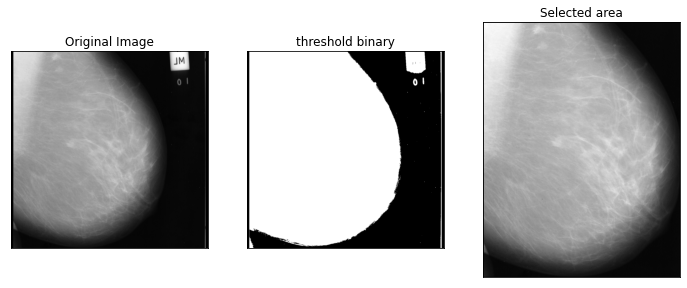

 The output of the ADAPRIVE HISTOGRAM EQULIZATION 


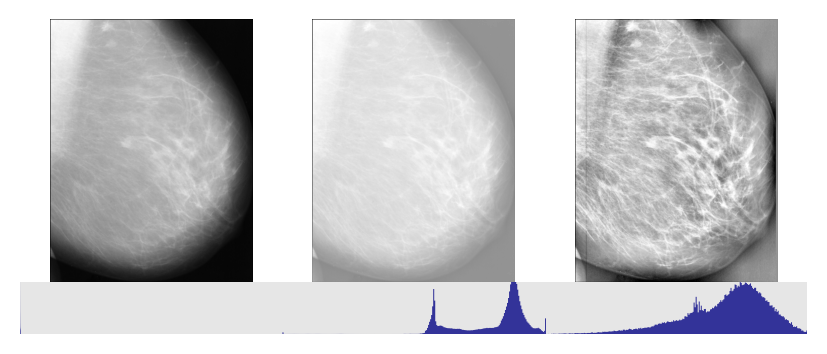

In [ ]:
Enhancement(img_name[50])

In [ ]:
# view image random images
def view_25_random_image():
    for i in range(25):
        rand = random.randint(0,len(img_names)-1)
        Enhancement(img_name[rand])



random_images = view_25_random_image()